In [34]:
import pandas as pd
import numpy as np
#import sys
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve
#np.set_printoptions(threshold=sys.maxsize)

### Gisette Dataset

In [66]:
#Importing the dataset
#Importing the dataset
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train.data')
data_train
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train_labels.labels')
data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid_labels.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape
#No Null data present at this stage

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

In [67]:
#Training data
data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)

means = np.array(np.mean(data_train))
means = means.reshape(1,data_train.shape[1])
stds = np.array(data_train.std())
stds = stds.reshape(1,data_train.shape[1])

data_train = (data_train - means)/stds
data_test = (data_test - means)/stds
data_test = pd.DataFrame(data_test)

cols1 = data_train.columns[data_train.isnull().any()].tolist()
cols1

cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols1 == cols2

data_train = data_train.drop(columns = cols1)
data_test = data_test.drop(columns = cols2)
data_train.shape,data_test.shape

((6000, 4955), (1000, 4955))

In [68]:
X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)
X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

(6000, 4956)
(1000, 4956)


In [69]:
def threshold_func(x,lam):
    r = np.where(np.abs(x)<=lam,0,x)
    return r

def sigmoid(z):
    return(1/(1 + np.exp(-z)))

In [70]:
def TISP(lam):
    N = data_train.shape[0]
    etap = 1/N
    cnt = []
    w_upd = np.zeros((X_train.shape[1],1)) 

    for i in range(100):
        XY = (X_train.T@Y_labels_train).reshape(-1,1)
        sig_Xw = sigmoid(X_train@w_upd)
        Xsig = X_train.T@sig_Xw
        grad = etap*(XY - Xsig)
        w_upd =  threshold_func(w_upd + grad,lam)
        count = np.count_nonzero(w_upd != 0)
        cnt.append(count)
        
    cnts = cnt[-1]
    wt = w_upd
    return cnts,wt

In [40]:
TISP(lam = 0.19) # For ten features

(10,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [41]:
TISP(lam = 0.133) # For 30 features

(30,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [42]:
TISP(lam = 0.0875) #For 100 features

(101,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [43]:
TISP(lam = 0.053) # For 300 features 

(299,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [44]:
TISP(lam = 0.03854) # For 500 features

(501,
 array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-0.04932242],
        [ 0.        ],
        [ 0.        ]]))

Text(0, 0.5, 'Missclassification Errors')

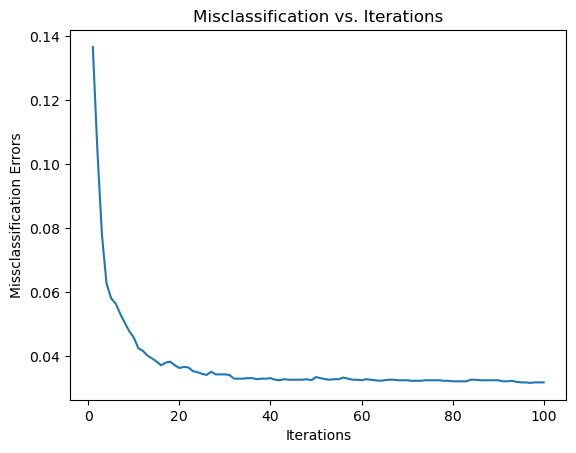

In [72]:
#For 100 features
#weights = []
#w = np.zeros((X_train.shape[1],1))
#w.shape
#weights.append(w)
N = data_train.shape[0]
etap = 1/N
cnt = []
missc_error_train = []
w_upd = np.zeros((X_train.shape[1],1))
for i in range(100):
    #w_ini = weights[i]
    XY = (X_train.T@Y_labels_train).reshape(-1,1)
    sig_Xw = sigmoid(X_train@w_upd)
    Xsig = X_train.T@sig_Xw
    grad = etap*(XY - Xsig)
    w_upd = w_upd + grad
    w_upd =  threshold_func(w_upd,0.0875)
    score_test = np.exp(X_test@w_upd) 
    score_train = np.exp(X_train@w_upd)
    pred_y_train = np.where(score_train > 1, 1, 0)
    missc_error1 = 1 - accuracy_score(Y_labels_train,pred_y_train)
    missc_error_train.append(missc_error1)
    count = np.count_nonzero(w_upd != 0)
    cnt.append(count)
    


plt.plot(np.arange(1,101,1),missc_error_train)
plt.title('Misclassification vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Missclassification Errors')

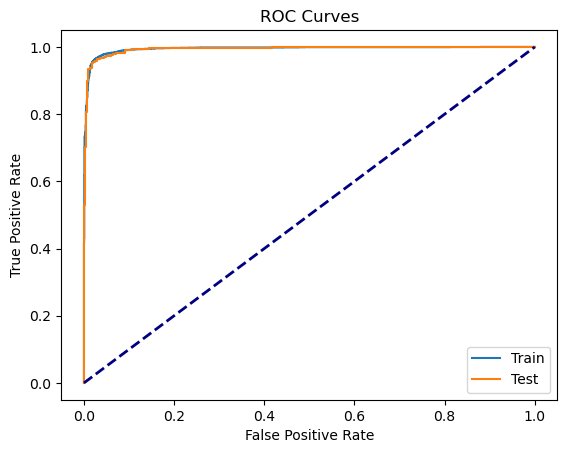

In [46]:
#ROC Curves
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, score_test)
plt.plot(fpr1, tpr1,label = 'Train')
plt.plot(fpr2, tpr2,label = 'Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

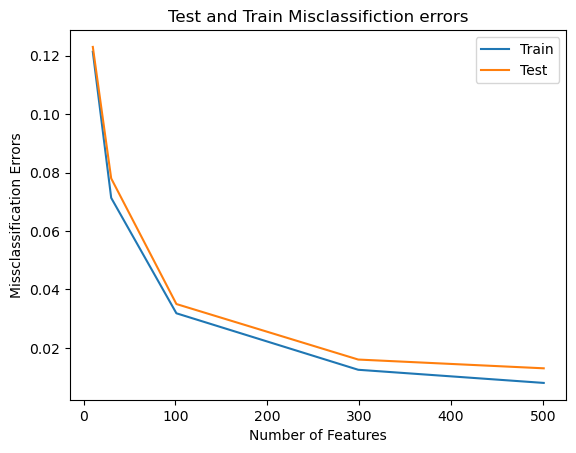

In [13]:
lam = [0.19,0.133,0.0875,0.053,0.03854]

train_miss_error = []
test_miss_error = []
n_features = []
wtss = []
for val in lam:
    TSP = TISP(lam = val)
    c = TSP[0]
    n_features.append(c)
    w = TSP[1]
    wtss.append(w)
    score_y_train = np.exp(X_train@w)
    pred_y_train = np.where(score_y_train>1,1,0)
    train_error = 1 - accuracy_score(Y_labels_train,pred_y_train)
    train_miss_error.append(train_error)
    
    score_y_test = np.exp(X_test@w)
    pred_y_test = np.where(score_y_test>1,1,0)
    test_error = 1 - accuracy_score(Y_labels_test,pred_y_test)
    test_miss_error.append(test_error)
    
    
    
plt.plot(n_features,train_miss_error,label = 'Train')   
plt.plot(n_features,test_miss_error,label = 'Test')
plt.xlabel('Number of Features')
plt.ylabel('Missclassification Errors')
plt.title('Test and Train Misclassifiction errors')
plt.legend()
plt.show()

table = pd.DataFrame({'Lambda Value' : lam, 'No. Of Features' : n_features,'Misclassification Error Train' : train_miss_error
                     , 'Misclassification Error Test' : test_miss_error})


In [14]:
table

,Lambda Value,No. Of Features,Misclassification Error Train,Misclassification Error Test
0,0.19000,10,0.121333,0.123
1,0.13300,30,0.071333,0.078
2,0.08750,101,0.031833,0.035
3,0.05300,299,0.012500,0.016
4,0.03854,501,0.008000,0.013


### Madelon Dataset

In [47]:
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.data')
data_train
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.labels')
data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape
#No Null data present at this stage

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data
data_train.shape,data_test.shape

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

#Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1

cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
#No Null columns for train and test

#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any())) 

X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape

X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)

0
0
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(2000, 501)
(600, 501)
(2000, 1)
(600, 1)


In [48]:
TISP(lam = 0.032)

(8,
 array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
       

In [49]:
TISP(lam = 0.0241)

(31,
 array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.11087599],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.08763355],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
      

In [50]:
TISP(lam = 0.0172)

(100,
 array([[ 0.        ],
        [ 0.        ],
        [ 0.08959154],
        [ 0.        ],
        [ 0.        ],
        [ 0.08951846],
        [-0.11399969],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.12534981],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.08549279],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.09660364],
        [ 0.        ],
        [-0.05791566],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.10219802],
     

In [51]:
TISP(lam = 0.0074)

(299,
 array([[ 0.        ],
        [ 0.        ],
        [ 0.11214649],
        [ 0.0560751 ],
        [ 0.        ],
        [ 0.09324242],
        [-0.13084143],
        [-0.01244851],
        [ 0.03072023],
        [ 0.05397097],
        [ 0.        ],
        [-0.1497287 ],
        [ 0.        ],
        [ 0.08985154],
        [ 0.        ],
        [-0.11743004],
        [ 0.06881383],
        [-0.00779713],
        [-0.04585564],
        [ 0.07480286],
        [-0.0701365 ],
        [ 0.        ],
        [ 0.10045983],
        [ 0.        ],
        [-0.07345449],
        [ 0.05221566],
        [ 0.0825924 ],
        [ 0.15546851],
        [ 0.05145449],
        [-0.06688517],
        [ 0.        ],
        [ 0.        ],
        [-0.07639475],
        [ 0.        ],
        [ 0.        ],
        [-0.08510764],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.09066463],
        [ 0.        ],
        [ 0.        ],
        [ 0.12197994],
     

In [52]:
TISP(lam = 0.00001)

(501,
 array([[-5.04807826e-03],
        [ 1.05743763e-02],
        [ 1.21976705e-01],
        [ 3.56061987e-02],
        [-2.07864477e-03],
        [ 1.20470188e-01],
        [-1.46288222e-01],
        [-2.04980745e-02],
        [ 4.03795376e-02],
        [ 8.11119764e-02],
        [ 4.21122781e-03],
        [-1.70924997e-01],
        [ 4.30313058e-02],
        [ 8.72009011e-02],
        [ 3.32649843e-02],
        [-1.18984907e-01],
        [ 6.01834735e-02],
        [-1.12749167e-02],
        [-4.60567565e-02],
        [ 7.64005040e-02],
        [-6.64013317e-02],
        [-3.38991416e-02],
        [ 1.07371541e-01],
        [ 5.34194586e-04],
        [-8.84522928e-02],
        [ 6.10514698e-02],
        [ 7.40798890e-02],
        [ 1.66735005e-01],
        [ 4.82904974e-02],
        [-9.64340854e-02],
        [-2.76075497e-02],
        [-1.95033371e-02],
        [-7.13648974e-02],
        [-2.65051187e-02],
        [ 4.85873733e-02],
        [-1.11849051e-01],
        [ 1.12242275e-

Text(0, 0.5, 'Missclassification Errors')

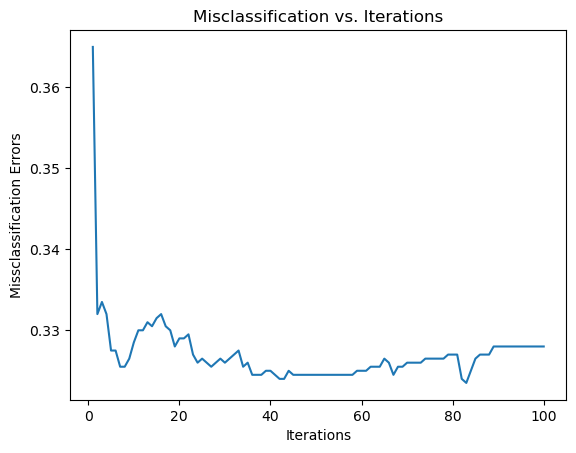

In [54]:
#For 100 features
#weights = []
#w = np.zeros((X_train.shape[1],1))
#w.shape
#weights.append(w)
N = data_train.shape[0]
etap = 1/N
cnt = []
missc_error_train = []
w_upd = np.zeros((X_train.shape[1],1))
for i in range(100):
    #w_ini = weights[i]
    XY = (X_train.T@Y_labels_train).reshape(-1,1)
    sig_Xw = sigmoid(X_train@w_upd)
    Xsig = X_train.T@sig_Xw
    grad = etap*(XY - Xsig)
    w_upd = w_upd + grad
    w_upd =  threshold_func(w_upd,0.0172)
    score_test = np.exp(X_test@w_upd)
    score_train = np.exp(X_train@w_upd)
    pred_y_train = np.where(score_train > 1, 1, 0)
    missc_error1 = 1 - accuracy_score(Y_labels_train,pred_y_train)
    missc_error_train.append(missc_error1)
    count = np.count_nonzero(w_upd != 0)
    cnt.append(count)
    


plt.plot(np.arange(1,101,1),missc_error_train)
plt.title('Misclassification vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Missclassification Errors')

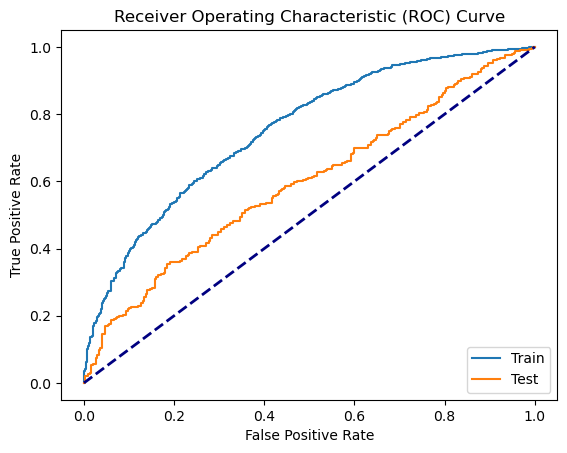

In [55]:
#ROC Curves
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, score_test)
plt.plot(fpr1, tpr1,label = 'Train')
plt.plot(fpr2, tpr2,label = 'Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

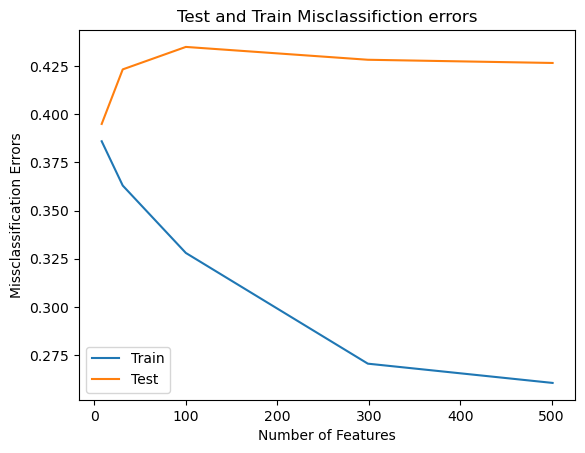

,Lambda Value,No. Of Features,Misclassification Error Train,Misclassification Error Test
0,0.03200,8,0.3860,0.395000
1,0.02410,31,0.3630,0.423333
2,0.01720,100,0.3280,0.435000
3,0.00740,299,0.2705,0.428333
4,0.00001,501,0.2605,0.426667


In [56]:
lam = [0.032,0.0241,0.0172,0.0074,0.00001]

train_miss_error = []
test_miss_error = []
n_features = []
wtss = []
for val in lam:
    TSP = TISP(lam = val)
    c = TSP[0]
    n_features.append(c)
    w = TSP[1]
    wtss.append(w)
    score_y_train = np.exp(X_train@w)
    pred_y_train = np.where(score_y_train>1,1,0)
    train_error = 1 - accuracy_score(Y_labels_train,pred_y_train)
    train_miss_error.append(train_error)
    
    score_y_test = np.exp(X_test@w)
    pred_y_test = np.where(score_y_test>1,1,0)
    test_error = 1 - accuracy_score(Y_labels_test,pred_y_test)
    test_miss_error.append(test_error)
    
    
    
plt.plot(n_features,train_miss_error,label = 'Train')   
plt.plot(n_features,test_miss_error,label = 'Test')
plt.xlabel('Number of Features')
plt.ylabel('Missclassification Errors')
plt.title('Test and Train Misclassifiction errors')
plt.legend()
plt.show()

table = pd.DataFrame({'Lambda Value' : lam, 'No. Of Features' : n_features,'Misclassification Error Train' : train_miss_error
                     , 'Misclassification Error Test' : test_miss_error})
table

### Dexter Dataset

In [57]:
data_train = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.csv',header = None)
data_train.shape
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.labels')
data_test = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.csv',header = None)
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data
data_train.shape,data_test.shape

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

#Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1

cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
#No Null columns for train and test
cols1 == cols2
#As the two columns have the same number of null values so we just go ahead and drop those

data_train = data_train.drop(cols1,axis = 1)
data_train.shape
np.where(data_train.isnull().any()) # No null values any more
print(data_train.shape)

data_test = data_test.drop(cols2,axis = 1)
print(data_test.shape)

#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any())) 

X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape


X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)

C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_9412\2298125429.py:19: RuntimeWarning: invalid value encountered in divide
  data_train = (data_train - means)/std_devs #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_9412\2298125429.py:29: RuntimeWarning: divide by zero encountered in divide
  data_test = (data_test - means)/std_devs   #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_9412\2298125429.py:29: RuntimeWarning: invalid value encountered in divide
  data_test = (data_test - means)/std_devs   #final data


12249
12249
(300, 7751)
(300, 7751)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(300, 7752)
(300, 7752)
(300, 1)
(300, 1)


In [58]:
TISP(lam = 0.143)

(9,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [59]:
TISP(lam = 0.098)

(30,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [60]:
TISP(lam = 0.0711)

(100,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [61]:
TISP(lam = 0.0523)

(299,
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [62]:
TISP(lam = 0.0466)

(500,
 array([[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.07844496],
        [0.        ],
        [0.10449624]]))

Text(0, 0.5, 'Missclassification Errors')

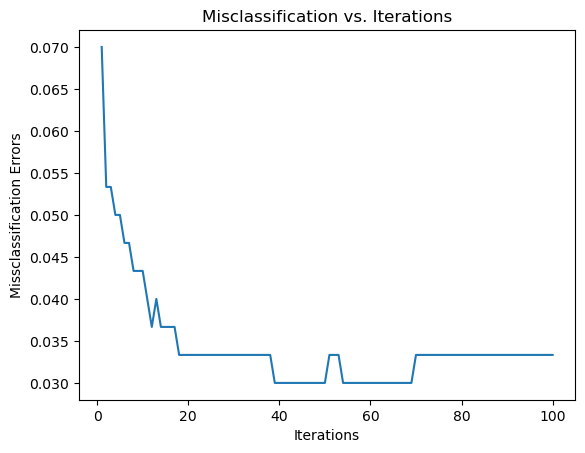

In [63]:
#For 100 features
#weights = []
#w = np.zeros((X_train.shape[1],1))
#w.shape
#weights.append(w)
N = data_train.shape[0]
etap = 1/N
cnt = []
missc_error_train = []
w_upd = np.zeros((X_train.shape[1],1))
for i in range(100):
    #w_ini = weights[i]
    XY = (X_train.T@Y_labels_train).reshape(-1,1)
    sig_Xw = sigmoid(X_train@w_upd)
    Xsig = X_train.T@sig_Xw
    grad = etap*(XY - Xsig)
    w_upd = w_upd + grad
    w_upd =  threshold_func(w_upd,0.0875)
    score_test = np.exp(X_test@w_upd)
    score_train = np.exp(X_train@w_upd)
    pred_y_train = np.where(score_train > 1, 1, 0)
    missc_error1 = 1 - accuracy_score(Y_labels_train,pred_y_train)
    missc_error_train.append(missc_error1)
    count = np.count_nonzero(w_upd != 0)
    cnt.append(count)
    


plt.plot(np.arange(1,101,1),missc_error_train)
plt.title('Misclassification vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Missclassification Errors')

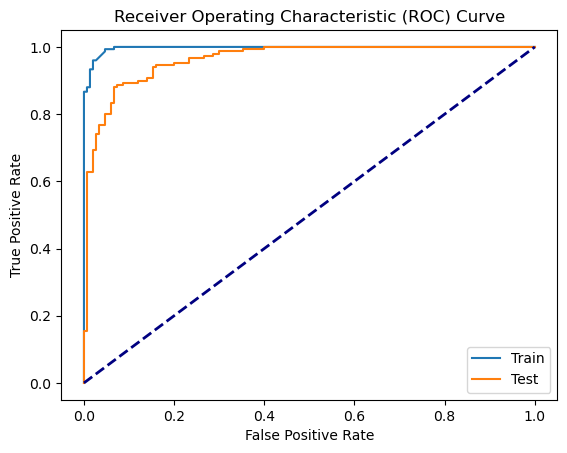

In [64]:
#ROC Curves
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, score_test)
plt.plot(fpr1, tpr1,label = 'Train')
plt.plot(fpr2, tpr2,label = 'Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

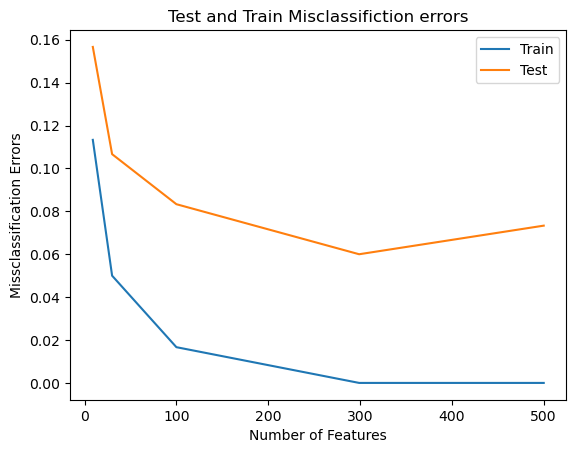

,Lambda Value,No. Of Features,Misclassification Error Train,Misclassification Error Test
0,0.1430,9,0.113333,0.156667
1,0.0980,30,0.050000,0.106667
2,0.0711,100,0.016667,0.083333
3,0.0523,299,0.000000,0.060000
4,0.0466,500,0.000000,0.073333


In [65]:
lam = [0.143,0.098,0.0711,0.0523,0.0466]

train_miss_error = []
test_miss_error = []
n_features = []
wtss = []
for val in lam:
    TSP = TISP(lam = val)
    c = TSP[0]
    n_features.append(c)
    w = TSP[1]
    wtss.append(w)
    score_y_train = np.exp(X_train@w)
    pred_y_train = np.where(score_y_train>1,1,0)
    train_error = 1 - accuracy_score(Y_labels_train,pred_y_train)
    train_miss_error.append(train_error)
    
    score_y_test = np.exp(X_test@w)
    pred_y_test = np.where(score_y_test>1,1,0)
    test_error = 1 - accuracy_score(Y_labels_test,pred_y_test)
    test_miss_error.append(test_error)
    
    
    
plt.plot(n_features,train_miss_error,label = 'Train')   
plt.plot(n_features,test_miss_error,label = 'Test')
plt.xlabel('Number of Features')
plt.ylabel('Missclassification Errors')
plt.title('Test and Train Misclassifiction errors')
plt.legend()
plt.show()

table = pd.DataFrame({'Lambda Value' : lam, 'No. Of Features' : n_features,'Misclassification Error Train' : train_miss_error
                     , 'Misclassification Error Test' : test_miss_error})
table